# Общий анализ датасета

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

In [4]:
# !gdown 1KYgELspl8kDpRB9sHTuydaQhKgqtYG9T
# !gdown 1GU3EX950oTp8Pt_mI5-M0pvkUyS9XHZy

Загружаем датасеты

In [5]:
data1 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 1.csv')
data2 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 2.csv')
data3 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 3.csv')

params = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Описание данных.csv')

data = pd.concat([data1, data2, data3], ignore_index=True)
data.head().T

,0,1,2,3,4
patient_id,BC_1_0001,BC_1_0002,BC_1_0003,BC_1_0004,BC_1_0005
stage,1,1,1,1,1
age,59,46,60,56,41
gender,Ж,Ж,Ж,Ж,Ж
menopausal_status,postmenopausal,premenopausal,postmenopausal,postmenopausal,perimenopausal
family_history,False,True,False,False,False
molecular_subtype,HR+HER2-,TNBC,TNBC,HR+HER2-,HR-HER2+
er_status,True,False,False,True,False
pr_status,True,False,False,False,False
her2_status,False,False,False,False,True


In [6]:
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = (data[bool_cols].astype(int))

features_to_transform = ['ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'survival_months']

for feature in features_to_transform:
    data[feature] = data[feature].str.replace(',', '.', regex=False)
    data[feature] = data[feature].astype(float)

data.head(5).T

,0,1,2,3,4
patient_id,BC_1_0001,BC_1_0002,BC_1_0003,BC_1_0004,BC_1_0005
stage,1,1,1,1,1
age,59,46,60,56,41
gender,Ж,Ж,Ж,Ж,Ж
menopausal_status,postmenopausal,premenopausal,postmenopausal,postmenopausal,perimenopausal
family_history,0,1,0,0,0
molecular_subtype,HR+HER2-,TNBC,TNBC,HR+HER2-,HR-HER2+
er_status,1,0,0,1,0
pr_status,1,0,0,0,0
her2_status,0,0,0,0,1


Статистика по признакам датасета

In [7]:
data.describe(include='all').T.assign(Var_Type = data.dtypes, Num_Unique = data.nunique(), NaNs = data.isna().sum())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Var_Type,Num_Unique,NaNs
patient_id,3000,3000,BC_3_1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,3000,0
stage,3000.0,NaN,NaN,NaN,2.0,0.816633,1.0,1.0,2.0,3.0,3.0,int64,3,0
age,3000.0,NaN,NaN,NaN,56.980333,12.906645,25.0,48.0,57.0,65.0,90.0,int64,66,0
gender,3000,1,Ж,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1,0
menopausal_status,3000,3,postmenopausal,2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,3,0
family_history,3000.0,NaN,NaN,NaN,0.145667,0.352831,0.0,0.0,0.0,0.0,1.0,int64,2,0
molecular_subtype,3000,4,HR+HER2-,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,4,0
er_status,3000.0,NaN,NaN,NaN,0.860667,0.346352,0.0,1.0,1.0,1.0,1.0,int64,2,0
pr_status,3000.0,NaN,NaN,NaN,0.692667,0.461466,0.0,0.0,1.0,1.0,1.0,int64,2,0
her2_status,3000.0,NaN,NaN,NaN,0.204667,0.403525,0.0,0.0,0.0,0.0,1.0,int64,2,0


Описание признаков

In [8]:
display(params)

,Параметр,Описание
0,patient_id,Уникальный идентификатор пациента
1,stage,Стадия РМЖ (1-4)
2,age,Возраст пациента
3,gender,Пол пациента
4,menopausal_status,Менопаузальный статус (premenopausal/perimenop...
5,family_history,Семейный анамнез РМЖ
6,molecular_subtype,Молекулярный подтип (HR+HER2-/HR+HER2+/HR-HER2...
7,er_status,Статус рецепторов эстрогена
8,pr_status,Статус рецепторов прогестерона
9,her2_status,Статус HER2


Делим признаки на числовые и категориальные

In [9]:
num_features = data.select_dtypes(include=[np.number]).columns.to_list()
cat_features = data.select_dtypes(include=[object]).columns.to_list()
cat_features.append(bool_cols)

print("Numerical features:", len(num_features))
print("Categorical features:", len(cat_features))

print(num_features)
print(cat_features)

Numerical features: 18
Categorical features: 10
['stage', 'age', 'family_history', 'er_status', 'pr_status', 'her2_status', 'brca_mutation', 'ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'has_metastasis', 'survival_months', 'performance_status', 'tumor_grade', 'positive_lymph_nodes']
['patient_id', 'gender', 'menopausal_status', 'molecular_subtype', 'treatment', 'surgery_type', 'metastasis_sites', 'lymph_node_status', 'treatment_response', Index(['family_history', 'er_status', 'pr_status', 'her2_status',
       'brca_mutation', 'has_metastasis'],
      dtype='object')]


In [10]:
cat_features = []
num_features = []

for col in data.columns:

    n_unique = data[col].nunique(dropna=True)

    # 1) категориальные: мало уникальных значений (<=5)
    #    или тип object/category/bool
    if (
        n_unique <= 5
        or data[col].dtype == 'object'
        or data[col].dtype.name == 'category'
        or data[col].dtype == 'bool'
    ):
        cat_features.append(col)

    # 2) числовые признаки: все остальные numeric
    elif is_numeric_dtype(data[col]):
        num_features.append(col)

print("Категориальные признаки:", cat_features)
print(len(cat_features))
print("Числовые признаки:", num_features)
print(len(num_features))


Категориальные признаки: ['patient_id', 'stage', 'gender', 'menopausal_status', 'family_history', 'molecular_subtype', 'er_status', 'pr_status', 'her2_status', 'brca_mutation', 'treatment', 'surgery_type', 'has_metastasis', 'metastasis_sites', 'performance_status', 'tumor_grade', 'lymph_node_status', 'treatment_response']
18
Числовые признаки: ['age', 'ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'survival_months', 'positive_lymph_nodes']
9


Гистограммы частот

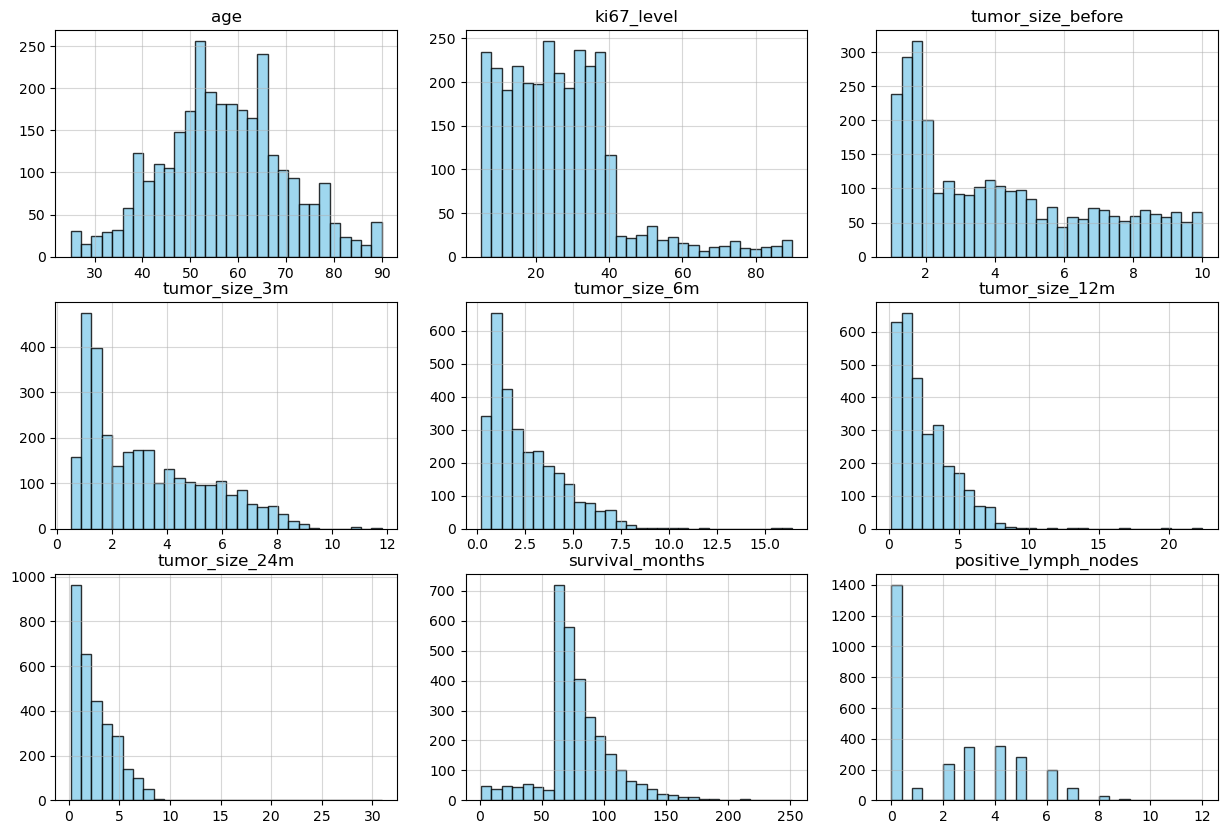

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
axes = ax.ravel()

for n, trait in enumerate(num_features):
    axes[n].hist(data[trait], bins=30, edgecolor='black', alpha=0.8, color='skyblue')
    axes[n].set_title(trait)
    axes[n].grid(True, alpha=0.5)

Боксплоты

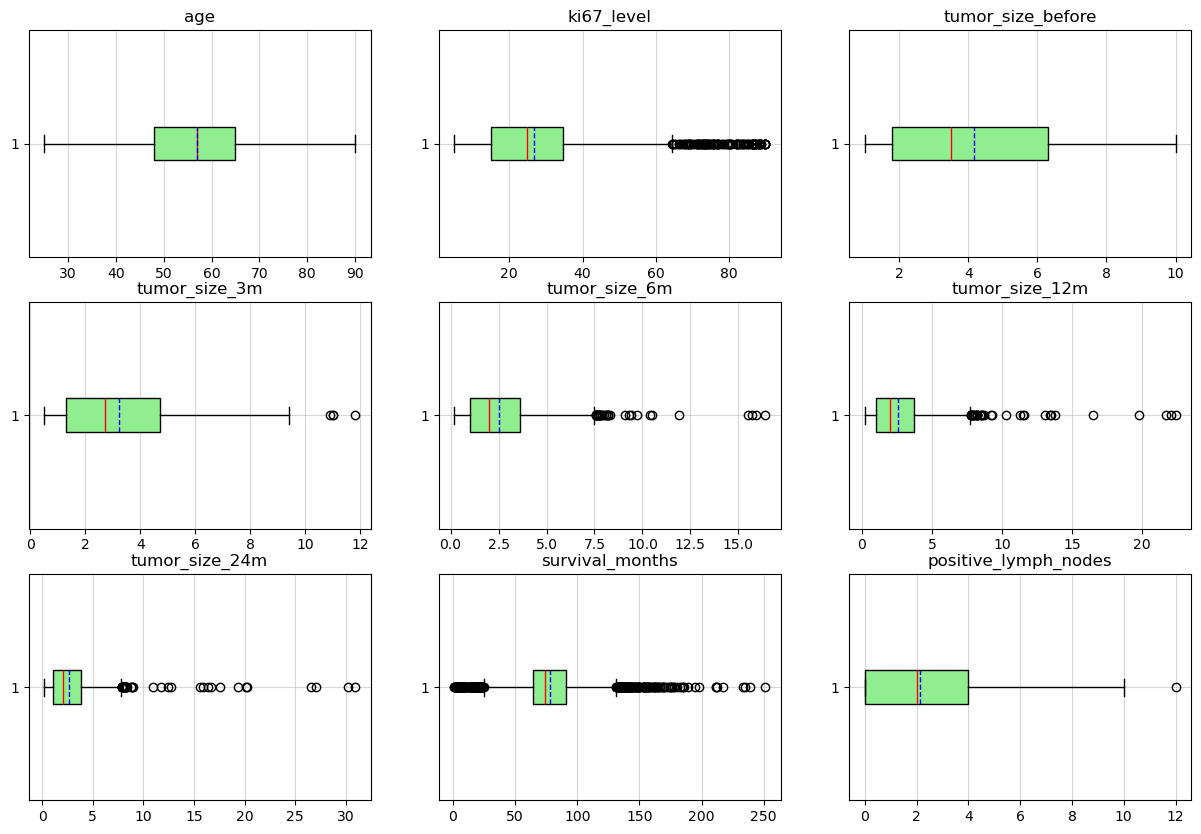

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
axes = ax.ravel()

for n, trait in enumerate(num_features):
    axes[n].boxplot(data[trait], vert=False, showfliers=True, showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), medianprops=dict(color='red'), meanprops=dict(color='blue'))
    axes[n].set_title(trait)
    axes[n].grid(True, alpha=0.5)

Матрица корреляции для категориальных признаков

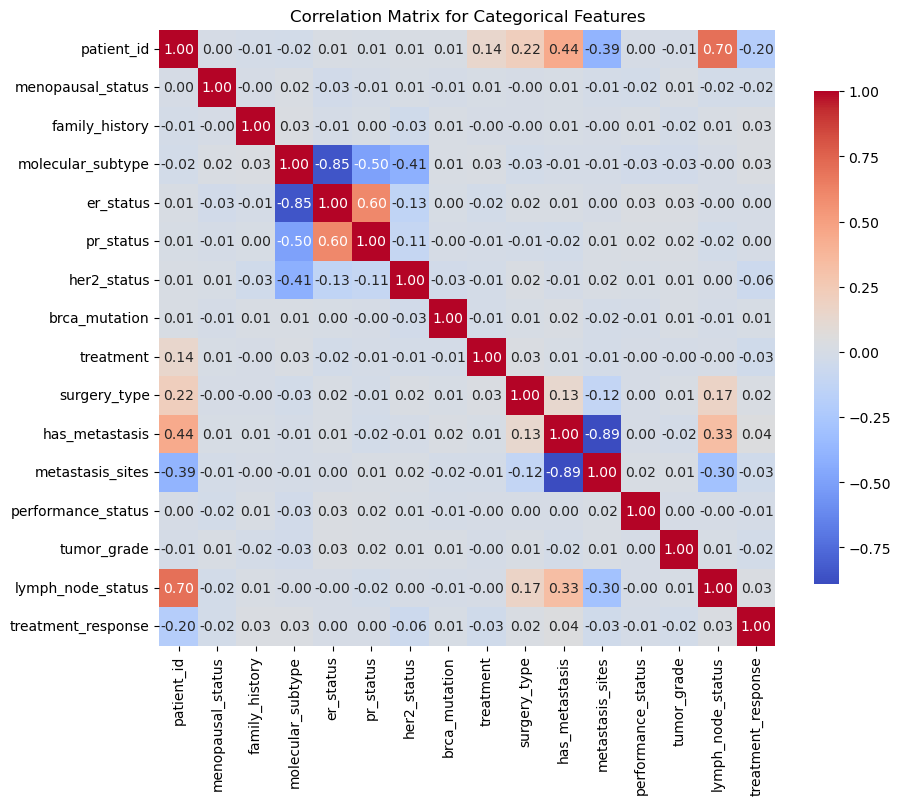

In [13]:
cat_features_wo_gender = [c for c in cat_features if c not in ['gender', 'stage']]
cat_data = data[cat_features_wo_gender].apply(lambda x: x.astype('category').cat.codes)

plt.figure(figsize=(10, 8))
sns.heatmap(cat_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Categorical Features')
plt.show()

Пайплоты

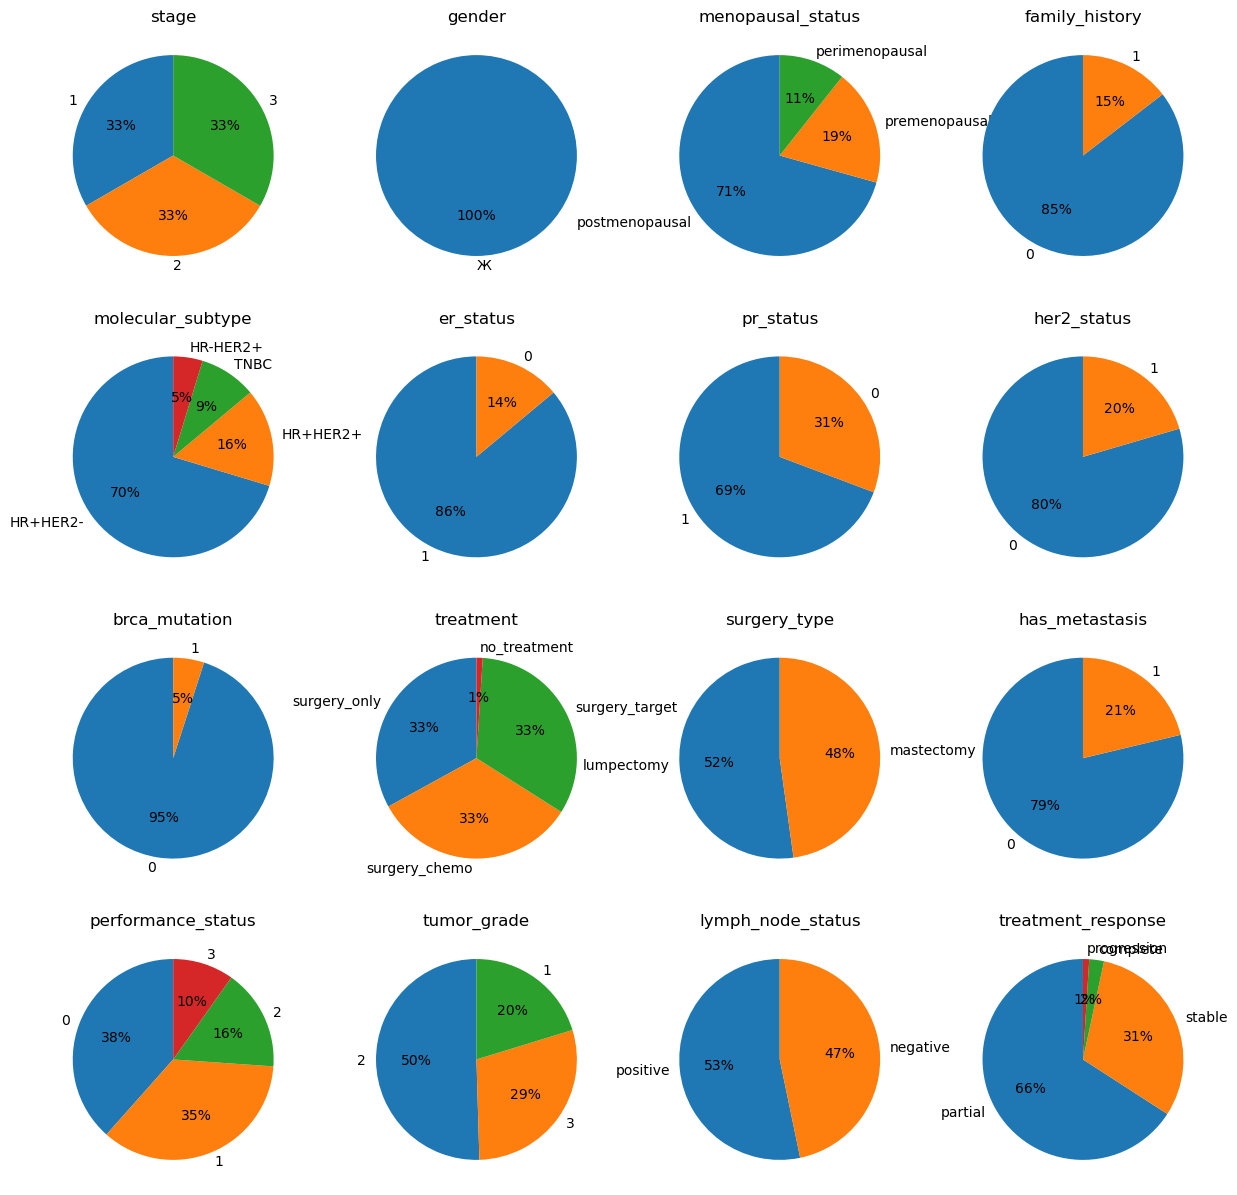

In [14]:
cat_features_for_pieplot = [c for c in cat_features if c not in ['patient_id', 'metastasis_sites']]
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

for n, cat in enumerate(cat_features_for_pieplot):
    pie_number=[n//4, n%4]
    ax[pie_number[0], pie_number[1]].pie(data[cat].value_counts(), startangle=90, labels=data[cat].value_counts().index ,autopct='%1.0f%%')
    ax[pie_number[0], pie_number[1]].set_title(cat)

# Проектирование модели

## Модель

In [15]:
import numpy as np
import pandas as pd

from scipy.integrate import solve_ivp
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

df = data.copy()

# точки измерения размера опухоли (в месяцах)
times = np.array([0.0, 3.0, 6.0, 12.0, 24.0])

# глобальный K: чуть больше максимального наблюдаемого размера
K_global = (
    df[['tumor_size_before', 'tumor_size_3m', 'tumor_size_6m',
            'tumor_size_12m', 'tumor_size_24m']].max().max() * 1.2
)

In [16]:
def define_breast_cancer_subtype(er, pr, her2, ki67):
    """
    Определяет молекулярный подтип рака молочной железы

    Args:
        er: статус рецепторов эстрогена (bool)
        pr: статус рецепторов прогестерона (bool)
        her2: статус HER2 (bool)
        ki67: уровень Ki-67 (%)

    Returns:
        str: молекулярный подтип
    """

    ki67 = float(ki67)

    # Тройной негативный (Базальноподобный)
    if not er and not pr and not her2:
        return 'Базальноподобный', 'TNBC'

    # HER2 положительный не-люминальный
    if her2 and not er and not pr:
        return 'HER2 положительный (не люминальный)', 'HR-HER2+'

    # Люминальные типы
    if er:
        if her2:
            return 'Люминальный В (HER2 положительный)', 'HR+HER2+B'
        elif ki67 >= 20 or not pr:  # Высокий Ki67 ИЛИ низкие РП
            return 'Люминальный В (HER2 отрицательный)', 'HR+HER2-B'
        else:  # Низкий Ki67 И высокие РП
            return 'Люминальный А', 'HR+HER2-A'

    return 'Неопределенный'

def define_breast_cancer_treatment(molecular_subtype):
    """
    Определяет рекомендуемую терапию в зависимости от молекулярного подтипа

    """
    match molecular_subtype:
        case "TNBC":
            return {
                "subtype": "TNBC",
                "main_therapy": "ХТ с включением антрациклинов и таксанов",
                "recommendations": [
                    "При T1a (≤ 5 мм) и N0: системная терапия не показана",
                    "при T1b и N0 возможно проведение 4 циклов ХТ DC (доцетаксел + циклофосфамид)",
                    "при T1c — T3 или N (+) — ХТ антрациклинами и таксанами: 4 цикла АС/ЕС → 12 еженедельных введений паклитаксела ± карбоплатин"
                ],
                "therapy_type": "chemotherapy"
            }

        case "HR-HER2+":
            return {
                "subtype": "HR-HER2+",
                "main_therapy": "ХТ + анти-HER2-терапия",
                "recommendations": [
                    "При T1a (≤ 5 мм) и N0 системная терапия не показана",
                    "при T1b, c (> 5 мм, но ≤ 20 мм) и N0: трастузумаб 12 мес. + ХТ без антрациклинов",
                    "при T2 — T3 (> 20 мм) или N (+): трастузумаб ± пертузумаб 12 мес. + ХТ"
                ],
                "therapy_type": "chemotherapy_her2"
            }

        case "HR+HER2+B":
            return {
                "subtype": "HR+HER2+B",
                "main_therapy": "ХТ + анти-HER2-терапия + ГТ",
                "recommendations": [
                    "При T1a (≤ 5 мм) и N0: только адъювантная ГТ",
                    "при T1b, c (> 5 мм, но ≤ 20 мм) и N0: трастузумаб + ХТ без антрациклинов",
                    "при T2 — T3 (> 20 мм) или N (+): трастузумаб ± пертузумаб + ХТ",
                    "после завершения ХТ - адъювантная ГТ с анти-HER2 терапией"
                ],
                "therapy_type": "chemotherapy_her2_hormone"
            }

        case "HR+HER2-B":
            return {
                "subtype": "HR+HER2-B",
                "main_therapy": "ХТ в большинстве случаев + ГТ",
                "recommendations": [
                    "При T1a-b (≤10 мм) и N0: только адъювантная ГТ",
                    "при T1c — T2 и N0-1: рассмотреть ХТ при С3, низком РЭ, высоком KI67",
                    "при T3 или N2: ХТ в большинстве случаев",
                    "в пременопаузе: возможен отказ от ХТ в пользу овариальной супрессии"
                ],
                "therapy_type": "chemotherapy_hormone"
            }

        case "HR+HER2-A":
            return {
                "subtype": "HR+HER2-A",
                "main_therapy": "Только ГТ в большинстве случаев",
                "recommendations": [
                    "ХТ рассматривать при поражении ≥ 4 лимфоузлов",
                    "режимы ХТ: DC (4 цикла) или AC/EC (4 цикла)"
                ],
                "therapy_type": "hormone_therapy"
            }

        case _:
            return {
                "subtype": molecular_subtype,
                "main_therapy": "информация о типе отсутствует",
                "recommendations": [],
                "therapy_type": "unknown"
            }
        
# 1. КОЭФФИЦИЕНТ ЭФФЕКТИВНОСТИ ЛЕЧЕНИЯ
def treatment_effect_coeff(patient_data):
    treatment = patient_data["treatment"]
    subtype = patient_data["new_molecular_subtype"]

    if treatment == "no_treatment":
        return 0.0

    if treatment == "surgery_only":
        return 0.3

    if treatment == "surgery_chemo":
        effects = {
            "HR+HER2-A": 0.25,
            "HR+HER2-B": 0.45,
            "HR+HER2+B": 1.00,
            "HR-HER2+": 1.40,
            "TNBC": 1.20
        }

    elif treatment == "surgery_target":
        effects = {
            "HR+HER2-A": 0.60,
            "HR+HER2-B": 0.55,
            "HR+HER2+B": 1.60,
            "HR-HER2+": 2.00,
            "TNBC": 0.45
        }

    return effects.get(subtype, 0)

df['new_molecular_subtype'] = df.apply(
    lambda row: define_breast_cancer_subtype(
        row['er_status'],
        row['pr_status'],
        row['her2_status'],
        row['ki67_level']
    )[1],
    axis=1
)

# Посмотрим на результаты
print(df[['patient_id', 'new_molecular_subtype']].head())
df.T

  patient_id new_molecular_subtype
0  BC_1_0001             HR+HER2-A
1  BC_1_0002                  TNBC
2  BC_1_0003                  TNBC
3  BC_1_0004             HR+HER2-B
4  BC_1_0005              HR-HER2+


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
patient_id,BC_1_0001,BC_1_0002,BC_1_0003,BC_1_0004,BC_1_0005,BC_1_0006,BC_1_0007,BC_1_0008,BC_1_0009,BC_1_0010,...,BC_3_0991,BC_3_0992,BC_3_0993,BC_3_0994,BC_3_0995,BC_3_0996,BC_3_0997,BC_3_0998,BC_3_0999,BC_3_1000
stage,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
age,59,46,60,56,41,55,58,47,52,40,...,59,47,43,80,39,52,70,89,27,43
gender,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж,...,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж,Ж
menopausal_status,postmenopausal,premenopausal,postmenopausal,postmenopausal,perimenopausal,postmenopausal,postmenopausal,perimenopausal,postmenopausal,postmenopausal,...,postmenopausal,postmenopausal,perimenopausal,postmenopausal,premenopausal,premenopausal,postmenopausal,postmenopausal,premenopausal,perimenopausal
family_history,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
molecular_subtype,HR+HER2-,TNBC,TNBC,HR+HER2-,HR-HER2+,HR+HER2-,HR+HER2-,HR+HER2-,HR+HER2-,HR+HER2-,...,HR+HER2-,HR+HER2-,TNBC,HR+HER2-,HR+HER2-,HR+HER2-,HR+HER2-,HR+HER2-,HR+HER2-,TNBC
er_status,1,0,0,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
pr_status,1,0,0,0,0,1,1,1,0,1,...,1,0,0,1,1,1,1,1,1,0
her2_status,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import math

GAMMA_INIT = 0.05  # стартовое значение для фита, не константа модели

def gompertz_treated_rhs(t, V, r, K, base_eff, gamma):
    """
    dV/dt = r * V * ln(K / V) - k_eff(t) * V

    где:
      base_eff  – базовая эффективность лечения (из treatment_effect_coeff, зависит от подтипа и Ki)
      gamma     – скорость развития резистентности (>= 0)

    Резистентность растёт во времени:
      resist(t) = 1 - exp(-gamma * t)

    Эффективность лечения убывает:
      k_eff(t) = base_eff * (1 - resist(t)) = base_eff * exp(-gamma * t)
    """
    # растущая резистентность (для смысла, но в уравнение идёт не она)
    # resist = 1.0 - math.exp(-gamma * t)

    # реально работающий kill-term:
    k_eff = base_eff * math.exp(-gamma * t)

    return r * V * math.log(K / V) - k_eff * V

# 3. СИМУЛЯЦИЯ И ПОДГОНКА r, k_max ДЛЯ ОДНОГО ПАЦИЕНТАs

def simulate_patient(params, patient_data):
    """
    Решает ОДУ Гомпертца с лечением и резистентностью для одной пациентки.

    params       = (r, gamma)
    patient_data – строка DataFrame
    Возвращает V(t) в точках times.
    """

    r, gamma = params
    V0 = patient_data['tumor_size_before']

    # базовая эффективность лечения по подтипу + Ki + терапии
    base_eff = treatment_effect_coeff(patient_data)

    sol = solve_ivp(
        lambda t, y: gompertz_treated_rhs(t, y[0], r, K_global, base_eff, gamma),
        [0, 24],
        [V0],
        t_eval=times,
        max_step=0.25
    )

    if not sol.success:
        return np.full_like(times, np.nan)

    return sol.y[0]


def loss_for_patient(param_array, patient_data):
    """
    param_array = [r, gamma]
    Возвращает сумму квадратов разницы между моделью и реальными размерами опухоли.
    """
    r = float(param_array[0])
    gamma = float(param_array[1])

    V_model = simulate_patient((r, gamma), patient_data)

    if np.any(~np.isfinite(V_model)):
        return 1e6  # штраф за неудачную интеграцию

    V_data = np.array([
        patient_data['tumor_size_before'],
        patient_data['tumor_size_3m'],
        patient_data['tumor_size_6m'],
        patient_data['tumor_size_12m'],
        patient_data['tumor_size_24m'],
    ], dtype=float)

    return float(np.sum((V_model - V_data) ** 2))


def fit_patient(patient_data):
    """
    Подгоняет (r, gamma) для одной пациентки
    методом L-BFGS-B, минимизируя loss_for_patient.
    Возвращает (r_fit, gamma_fit, SSE).
    """

    # старт: умеренный рост и умеренная скорость развития резистентности
    x0 = np.array([0.3, GAMMA_INIT])  # (r0, gamma0)

    # разумные границы
    bounds = [
        (0.01, 1.2),   # r
        (0.0,  0.5),   # gamma (0 – нет роста резистентности, 0.5 – очень быстро)
    ]

    result = minimize(
        lambda x: loss_for_patient(x, patient_data),
        x0=x0,
        bounds=bounds,
        method='L-BFGS-B',
        options={'maxiter': 80}
    )

    if not result.success:
        return np.nan, np.nan, result.fun

    r_fit = float(result.x[0])
    gamma_fit = float(result.x[1])
    return r_fit, gamma_fit, result.fun

# 4. ПОДГОНКА ДЛЯ ВСЕХ ПАЦИЕНТОК С ДИНАМИКОЙ
df['r_fit'] = np.nan
df['gamma_fit'] = np.nan
df['fit_sse'] = np.nan
df['fit_rmse'] = np.nan

for i, patient_params in df.iterrows():
    r_fit, gamma_fit, err = fit_patient(patient_params)
    df.loc[i, 'r_fit'] = r_fit
    df.loc[i, 'gamma_fit'] = gamma_fit
    df.loc[i, 'fit_sse'] = err
    df.loc[i, 'fit_rmse'] = np.sqrt(err / len(times))

rmse_threshold = 1.0  # см
df_train_r = (
    df[df['fit_rmse'] < rmse_threshold]
    .dropna(subset=['r_fit', 'gamma_fit'])
    .reset_index(drop=True)
)
print(f"Количество пациенток с хорошей подгонкой (RMSE < {rmse_threshold} см): {len(df_train_r)}")

Количество пациенток с хорошей подгонкой (RMSE < 1.0 см): 2981


In [26]:
# 6. ОБУЧЕНИЕ CatBoost для предсказания r

# признаки для предсказания модели
patient_features_for_prediction = [
    'tumor_size_before',
    'age',
    'ki67_level',
    'tumor_grade',
    'molecular_subtype',
    'brca_mutation',
    'family_history',
    'performance_status',
    'menopausal_status',
]

# используем только те признаки, которые реально есть в датасете
feature_cols = [col for col in patient_features_for_prediction if col in df_train_r.columns]

X_r = df_train_r[feature_cols].copy()
y_r = df_train_r['r_fit'].copy()

X_train, X_val, y_train, y_val = train_test_split(
    X_r,
    y_r,
    test_size=0.2,
    random_state=42,
)

# 3) индексы категориальных признаков
cat_features_idx = [
    i for i, col in enumerate(feature_cols)
    if X_r[col].dtype == 'object'
       or str(X_r[col].dtype).startswith('category')
       or X_r[col].dtype == bool
]

# 4) Pool для CatBoost
train_pool = Pool(X_train, y_train, cat_features=cat_features_idx)
val_pool   = Pool(X_val,   y_val,   cat_features=cat_features_idx)

# 5) Обучение модели только для r
model_r = CatBoostRegressor(
    loss_function='RMSE',
    depth=4,
    learning_rate=0.05,
    iterations=400,
    random_seed=42,
    verbose=False
)

model_r.fit(train_pool, eval_set=val_pool, verbose=False)

# 6) Оценка на валидации
y_val_pred = model_r.predict(val_pool)
rmse_val   = mean_squared_error(y_val, y_val_pred)
r2_val     = r2_score(y_val, y_val_pred)

print(f"RMSE(r) val = {rmse_val:.4f}")
print(f"R^2(r)  val = {r2_val:.4f}")

def estimate_r_catboost(patient_params, model_r, feature_cols, cat_features_idx):
    """
    Оценка скорости роста r для отдельного пациента
    по его признакам через обученную CatBoost-модель.
    """
    X_row = pd.DataFrame({col: [patient_params[col]] for col in feature_cols})
    pool = Pool(X_row, cat_features=cat_features_idx)
    r_pred = float(model_r.predict(pool)[0])
    return r_pred

def predict_new_patient_with_catboost(patient_params,
                                      model_r,
                                      feature_cols,
                                      cat_features_idx,
                                      t_end: float = 36.0,
                                      dt: float = 0.25,
                                      V0: float | None = None,
                                      K: float | None = None,
                                      gamma_est: float | None = None):
    """
    Прогноз динамики опухоли для пациентки без истории роста.

    Использует:
      - r_est из CatBoost,
      - base_eff = treatment_effect_coeff(patient_params),
      - gamma_est из df_train_r (по подтипу или глобально),
      - уравнение Гомпертца: dV/dt = r V ln(K/V) − base_eff·exp(−gamma·t)·V
    """

    # начальный размер
    if V0 is None:
        V0 = float(patient_params['tumor_size_before'])

    # предел размера
    if K is None:
        K = K_global

    # ВАЖНО: здесь должен быть ВЫЗОВ CatBoost, а не рекурсия!
    r_est = estimate_r_catboost(patient_params, model_r, feature_cols, cat_features_idx)

    # базовая эффективность лечения
    base_eff = treatment_effect_coeff(patient_params)

    # оценка gamma: если не задана — берём среднюю по подтипу или общую
    if gamma_est is None:
        if 'molecular_subtype' in df_train_r.columns:
            subtype = patient_params.get('molecular_subtype', None)
            if subtype in df_train_r['molecular_subtype'].unique():
                gamma_est = float(
                    df_train_r[df_train_r['molecular_subtype'] == subtype]['gamma_fit'].mean()
                )
            else:
                gamma_est = float(df_train_r['gamma_fit'].mean())
        else:
            gamma_est = float(df_train_r['gamma_fit'].mean())

    # сетка времени
    t_grid = np.arange(0.0, t_end + dt, dt)

    def rhs(t, y):
        return gompertz_treated_rhs(t, y[0], r_est, K, base_eff, gamma_est)

    sol = solve_ivp(rhs, [0, t_end], [V0], t_eval=t_grid, max_step=dt)

    if not sol.success:
        raise RuntimeError(f"ODE solver failed: {sol.message}")

    V_pred = sol.y[0]

    params = {
        "r_est": r_est,
        "K": K,
        "base_eff": base_eff,
        "gamma_est": gamma_est,
    }

    return t_grid, V_pred, params


RMSE(r) val = 0.0091
R^2(r)  val = 0.4993


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_train_valid_pair_random_plotly(df_train_r,
                                        model_r,
                                        feature_cols,
                                        cat_features_idx,
                                        t_end: float = 24.0,
                                        dt: float = 0.25):
    """
    ОДИН случайный пациент:
      слева  – кривая по (r_fit, gamma_fit) (подгонка по данным),
      справа – кривая по r, предсказанному CatBoost + Гомпертц.
    """

    # случайный пациент
    idx = np.random.choice(df_train_r.index)
    row = df_train_r.loc[idx]

    # реальные точки
    V_data = np.array([
        row['tumor_size_before'],
        row['tumor_size_3m'],
        row['tumor_size_6m'],
        row['tumor_size_12m'],
        row['tumor_size_24m'],
    ], dtype=float)

    pid = row.get('patient_id', idx)

    # левая кривая: fit по (r_fit, gamma_fit)
    V_fit = simulate_patient((row['r_fit'], row['gamma_fit']), row)

    # правая кривая: прогноз по модели
    t_grid, V_pred, params = predict_new_patient_with_catboost(
        patient_params=row,
        model_r=model_r,
        feature_cols=feature_cols,
        cat_features_idx=cat_features_idx,
        t_end=t_end,
        dt=dt,
    )

    fig = make_subplots(
        rows=1, cols=2,
        shared_yaxes=True,
        subplot_titles=(
            f"Fit по данным\n(r_fit={row['r_fit']:.3f}, γ_fit={row['gamma_fit']:.3f})",
            f"Прогноз модели\n(r_pred≈{params['r_est']:.3f}, γ≈{params['gamma_est']:.3f})"
        )
    )

    # ЛЕВО: fit
    fig.add_trace(
        go.Scatter(
            x=times,
            y=V_data,
            mode='markers',
            name='наблюдения',
            marker=dict(color='red', size=9, line=dict(color='black', width=1)),
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=times,
            y=V_fit,
            mode='lines',
            name='fit (Гомпертц)',
            line=dict(width=3),
        ),
        row=1, col=1
    )

    # ПРАВО: прогноз
    fig.add_trace(
        go.Scatter(
            x=times,
            y=V_data,
            mode='markers',
            name='наблюдения (те же точки)',
            marker=dict(color='red', size=9, line=dict(color='black', width=1)),
            showlegend=False,
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(
            x=t_grid,
            y=V_pred,
            mode='lines',
            name='прогноз (CatBoost + Гомпертц)',
            line=dict(width=3),
        ),
        row=1, col=2
    )

    fig.update_layout(
        title=f"Пациент {pid} | Подтип: {row.get('molecular_subtype', 'NA')}",
        title_x=0.5,
        hovermode='x unified',
        plot_bgcolor='rgba(0,0,0,0)',
        legend=dict(
            orientation='h',
            yanchor='bottom', y=1.02,
            xanchor='center', x=0.5
        ),
        height=450,
        width=950,
    )

    fig.update_xaxes(title_text="Месяцы", row=1, col=1)
    fig.update_xaxes(title_text="Месяцы", row=1, col=2)
    fig.update_yaxes(title_text="Размер опухоли (см)", row=1, col=1)

    fig.show()


In [46]:
print("\n=== Метрики модели CatBoost для r (валидация) ===")
print(f"RMSE по r: {rmse_val:.4f}")
print(f"R^2 по r:  {r2_val:.4f}")

plot_train_valid_pair_random_plotly(df_train_r, model_r, feature_cols, cat_features_idx)


=== Метрики модели CatBoost для r (валидация) ===
RMSE по r: 0.0091
R^2 по r:  0.4993
